# Regresion lineal

- Aprendizaje supervisado
- Aprendizaje basado en modelos
- Se corresponde con un modelo lineal
- Realiza predicciones computando una suma ponderada de las caracteristicas de entrada y sumando una constante conocida como
- Intenta predecri valorees continuos

x = a las variable de entrada
y = a la variable de salida
(x,y) = ejemplos de entrenamiento

Ejemplo 1:

- Se tiene un conjunto de datos donde los feuatures son el numero de sistemas afectados (x) e (y) el coste en euros

i1 = 1000 y este tiene un coste de 10000 euros
i2 = 1500 y este tiene un coste de 20000 euros
i3 = 500 y este tiene un coste de 5500 euros

x1 sabemos que es el numero de sistemas afectados en caso de tener mas features seria x1,x2,x3,x4,x5,x6,x7,x8,x9,x10....


Un ejemplo de entrenamiento podria ser (500, 5500) que es el caso i3.



## Regreesion lineal - Funcion hipotesis

- La funcion hipotesis es una funcion lineal que se utiliza para predecir valores continuos
- La funcion hipotesis se define como:
- h(x) = theta0 + theta1 * x - Esto significa que la funcion hipotesis es una funcion lineal que se define por la ecuacion de la recta

En una regresion lineal uinivariable solo tenemos un feature, por lo que la funcion hipotesis es una funcion lineal que se define por la ecuacion de la recta
En una regresion lineal multivariable tenemos mas de un feature, por lo que la funcion hipotesis es una funcion lineal que se define por la ecuacion de la recta

## Regresion lineal - Construccion del modelo

- Buscar los parametros de theta0 y theta1 que generen la funcion hipotesis (h(x)) que mejor se ajuste a los datos de entrenamiento (x,y)
- Se mionimiza una funcion de coste (j(theta0, theta1)) para obteneer los pararametros de theta0 y theta1 optimos.

## Funciones de coste

- La funcion de coste es una funcion que mide el error de la funcion hipotesis con respecto a los datos de entrenamiento

la formula es: j(theta0, theta1) = 1/2m * sumatoria de (h(x) - y)^2

## Regresion lineal - Minimizacion de la funcion de coste

- Se minimiza la funcion de coste para obtener los parametros de theta0 y theta1 optimos

La formula es: theta0 = theta0 - alpha * 1/m * sumatoria de (h(x) - y)

# REGRESION LINEAL: Coste de un incidente de seguridad

Este ejercicio consiste en predecir el coste de un incidente de sefguridad en base al numero de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

# 1. Generacion de datos de entrenamiento

In [1]:
# Generacionde conjunto de datos

import numpy as np

X = 2 * np.random.rand(100, 1) # Estos van a ser el numero de equipos afectados
y = 4 + 3 * X + np.random.randn(100, 1) # Y estos son el coste de los incidentes.  Usamos 4 + 3 * X para que la pendiente sea 3 y el termino independiente sea 4. Eso es debido a que la funcion hipotesis es h(x) = theta0 + theta1 * x


print("La longitud de los datos es::", len(X))

La longitud de los datos es:: 100


# 2. Visualizacion de los datos de entrenamiento

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Coste incidente (u/1000)')

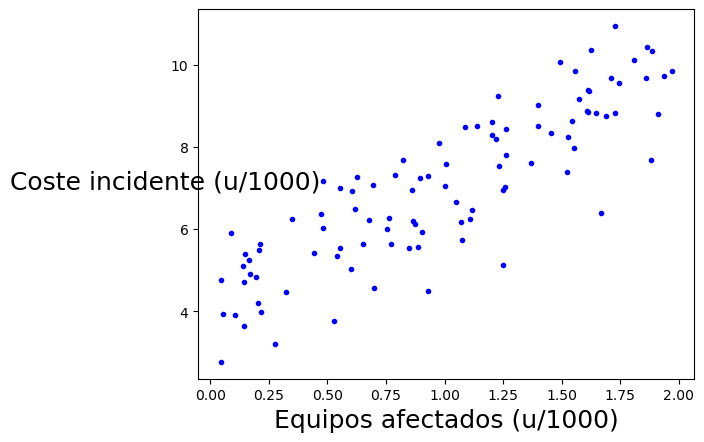

In [3]:
plt.plot(X, y, "b.") # "b." indica el color de la linea
plt.xlabel("Equipos afectados (u/1000)", fontsize=18)
plt.ylabel("Coste incidente (u/1000)", rotation=0, fontsize=18)

# 3. Modificaciondel conjunto de datos de entrenamiento

In [4]:
import pandas as pd

In [5]:
data = {"n_equipos_afectados": X.flatten(), "coste_incidente": y.flatten()} # Flatten devuelve una lista con los datos de entrenamiento
df = pd.DataFrame(data)
df.head(10)

,n_equipos_afectados,coste_incidente
0,1.247861,5.121505
1,1.072816,5.734732
2,0.866063,6.192747
3,1.726199,10.947469
4,0.442137,5.415271
5,1.001863,7.038738
6,0.698321,4.564021
7,0.168398,4.899969
8,1.624893,10.362782
9,1.396676,9.027355


In [6]:
# Escalando del numero de equipos afectados

df["n_equipos_afectados"] = df["n_equipos_afectados"] * 1000
df["n_equipos_afectados"] = df["n_equipos_afectados"].astype(int)

#Escalando el coste

df["coste_incidente"] = df["coste_incidente"] * 1000
df["coste_incidente"] = df["coste_incidente"].astype(int)
df.head(10)

,n_equipos_afectados,coste_incidente
0,1247,5121
1,1072,5734
2,866,6192
3,1726,10947
4,442,5415
5,1001,7038
6,698,4564
7,168,4899
8,1624,10362
9,1396,9027


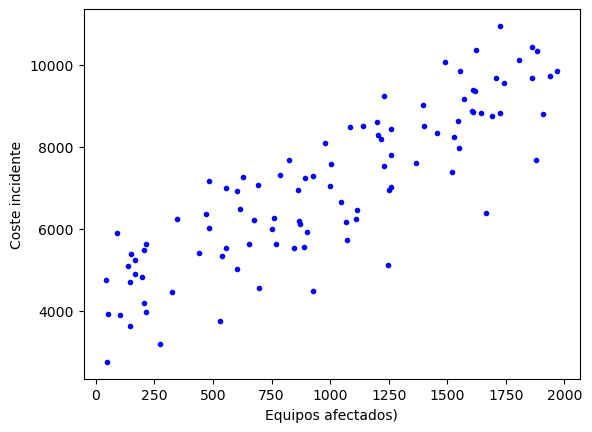

In [7]:
# Representacion grafica del conjunto de datos de entrenamiento

plt.plot(df["n_equipos_afectados"], df["coste_incidente"], "b.")
plt.xlabel("Equipos afectados)")
plt.ylabel("Coste incidente")
plt.show()

# 4. Contstruccion del modelo

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
# Construccion del modelo y ajuste de la funcion hipotesis

lin_reg = LinearRegression() # Esto lo hacemos para llamar al algoritmo de regresion lineal
lin_reg.fit(df["n_equipos_afectados"].values.reshape(-1, 1), df["coste_incidente"].values) # Esto sirve para entrenar el algoritmo con .fit.

# Le damos las variables de entradas X que es "nunmero de equipos afectados y usamos el metodo .values para obtener los valores de X y el .reshape para convertirlo en un array de 2 dimensiones
# En la salida Y le damos el coste de los incidentes y usamos el metodo .values para obtener los valores de Y

# Si sale ese resultado es que el modelo ha sido entrenado correctamente Tetha0 y Tetha1

LinearRegression()

In [13]:
# Parametro de theta0

lin_reg.intercept_

# nuestro resultado es theta0 = 4.14 que es el valor que le hemos dado a la funcion hipotesis en la generacion de datos de entrenamiento. En la grafica de la funcion hipotesis es el punto donde corta el eje Y

4140.961182055769

In [14]:
# Parametro de theta1

lin_reg.coef_

array([2.91207737])

In [15]:
# Ahora realizamos la prediccion para el valor minimo y maximo del conjunto de datos de entrenamiento

X_min_max = np.array([[df["n_equipos_afectados"].min()], [df["n_equipos_afectados"].max()]]) # Esto es para obtener el valor minimo y maximo de los datos de entrenamiento
y_pred = lin_reg.predict(X_min_max) # Esto es para predecir el valor de la funcion hipotesis con los valores minimo y maximo de los datos de entrenamiento

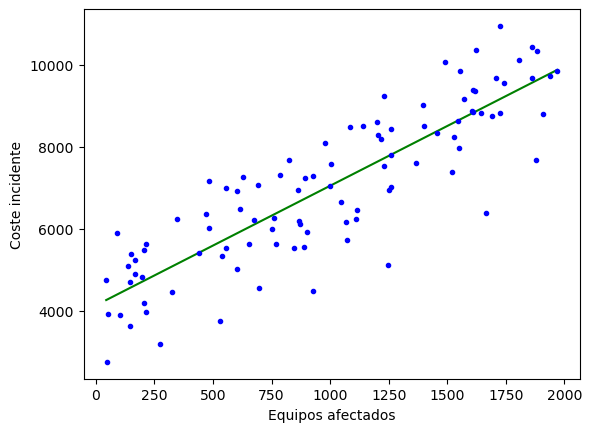

In [16]:
# Representacion grafica de la funcion hipotesis generada

plt.plot(X_min_max, y_pred, "g-")
plt.plot(df["n_equipos_afectados"], df["coste_incidente"], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste incidente")
plt.show()

# 5. Prediccion de nuevos ejemplos

In [17]:
x_new = np.array([[1200]]) # Estos son los nuevos datos de entrada

# Prediccion del coste que tendria el incidente con 1200 equipos afectados

coste_equipos = lin_reg.predict(x_new)

print("El coste del incidente con 1200 equipos afectados es de: ", int(coste_equipos[0]), "€")

El coste del incidente con 1200 equipos afectados es de:  7635 €


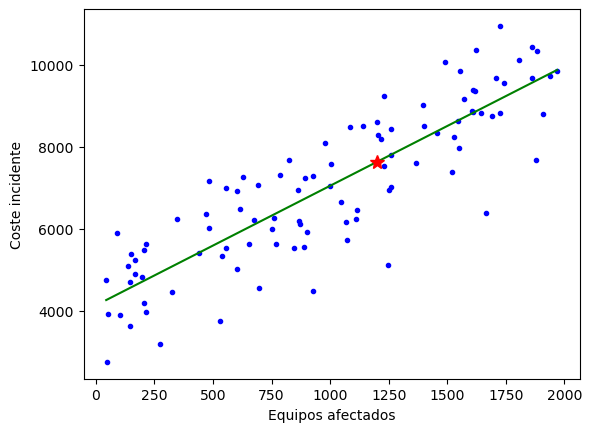

In [19]:
plt.plot(df["n_equipos_afectados"], df["coste_incidente"], "b.")
plt.plot(X_min_max, y_pred, "g-")
plt.plot(x_new, coste_equipos, "r*", markersize=10)
plt.xlabel("Equipos afectados")
plt.ylabel("Coste incidente")
plt.show()